In [1]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import random
import pandas as pd
import os

class MyModel_0(nn.Module):
    def __init__(self):#在这里定义网络层
        super(MyModel_0, self).__init__()
        self.liner1=nn.Linear(1504,1,bias=False)
        nn.init.zeros_(self.liner1.weight)

    def forward(self,x):#前向传播
        output=self.liner1(x)
        return output
    
class MyModel_1(nn.Module):
    def __init__(self):#在这里定义网络层
        super(MyModel_1, self).__init__()
        self.liner1=nn.Linear(1504,1,bias=False)
        nn.init.zeros_(self.liner1.weight)

    def forward(self,x):#前向传播
        output=self.liner1(x)
        return output

class CustomLoss(torch.nn.Module):
    def __init__(self):
        super(CustomLoss, self).__init__()

    def forward(self, output, target):
        loss = torch.mean(0.5*(output - target)**2)   # 定义自己的损失函数，这里是MSE
        return loss
model_0=MyModel_0()#建立模型
model_1=MyModel_1()#建立模型
loss_fn=CustomLoss()#构建损失函数
optimizer_0=optim.Adam(model_0.parameters(),lr=0.001)#构建优化器(模型参数,学习率)
optimizer_1=optim.Adam(model_1.parameters(),lr=0.001)#构建优化器(模型参数,学习率)

In [2]:
model_0.load_state_dict(torch.load(r"C:\Users\98306\Desktop\实验\final_test\只有两个递减的特征\model_0.pkl")) 
model_1.load_state_dict(torch.load(r"C:\Users\98306\Desktop\实验\final_test\只有两个递减的特征\model_1.pkl")) 

<All keys matched successfully>

In [3]:
#full
file_name=np.array([50,100,200,300,400,500])
y11=[]
y12=[]
y13=[]
# file_name=np.array([100])
for i in file_name:
    root_path="C:\\Users\\98306\\Desktop\\实验\\final_test\\test\\500"
    res,B_=0,0
    people=0
    for j in range(20):
        road_path=os.path.join(root_path,str(j)+'_road.xlsx')
        road=pd.read_excel(road_path)
        road=road.to_numpy()
        road=road[:i]
        
        b_path=os.path.join(root_path,str(j)+'_b.xlsx')
        b=pd.read_excel(b_path,header=None)
        b=b.to_numpy().flatten()
        b=b[:i]
        
        path=r'C:\Users\98306\Desktop\实验\Real map\poi次数分布(总次数为1241).xlsx'
        df=pd.read_excel(path)
        arr_df = df.to_numpy().flatten()
        B=5000
        danwei_b=B/(1241*30)
        for k in range(road.shape[0]):
            for w in range(road.shape[1]):
                if arr_df[w]==0:
                    road[k,w]=0
            if road[k].sum()*danwei_b<b[k]:
                continue
            s= np.array([]).astype(np.double)
            s= np.append(s,1)#
            s= np.append(s,k)#D
            s= np.concatenate((s, road[k]))#I 将road[j]按照从小到大排序一下
            s= np.append(s,b[k])#D
            s= np.concatenate((s,arr_df))#I
            s= np.append(s,B)#I
            s=torch.Tensor(s)
            t0=model_0(s)
            t1=model_1(s)
#             print("t0[0]:",t0[0],'t1[0]',t1[0])
            if t0[0]<t1[0]:
                B-=road[k].sum()*danwei_b
                res+=road[k].sum()
                people+=1
#                 print('yes:',road[k].sum(),b[k])
                for w in range(road.shape[1]):
                    if road[k,w]>0:
                        arr_df[w]-=1
#             else:
#                 print('no:',road[k].sum(),b[k])
#         print("----------")
        B_+=B
    print("用户数量:",i,"   平均价值：",res/20,"    平均支付预算:",5000-B_/20,"    平均选中人数:",people/20)
    y11.append(res/20)
    y12.append(5000-B_/20)
    y13.append(people/20)

用户数量: 50    平均价值： 12212.386090472279     平均支付预算: 1640.1270602299583     平均选中人数: 16.0
用户数量: 100    平均价值： 13092.604619959533     平均支付预算: 1758.3406688100354     平均选中人数: 18.85
用户数量: 200    平均价值： 13355.295605781008     平均支付预算: 1793.6201458207088     平均选中人数: 20.5
用户数量: 300    平均价值： 13483.21876828321     平均支付预算: 1810.8002643410155     平均选中人数: 21.8
用户数量: 400    平均价值： 13569.362506533067     平均支付预算: 1822.369393840056     平均选中人数: 22.55
用户数量: 500    平均价值： 13589.470532539262     平均支付预算: 1825.0699076738188     平均选中人数: 22.8


In [ ]:
用户数量: 50    平均价值： 12233.007838281534     平均支付预算: 1642.8965670536572     平均选中人数: 16.9
用户数量: 100    平均价值： 13018.7562671912     平均支付预算: 1748.4228132139674     平均选中人数: 19.05
用户数量: 200    平均价值： 13242.429802957622     平均支付预算: 1778.4622351541266     平均选中人数: 22.2
用户数量: 300    平均价值： 13398.726673915784     平均支付预算: 1799.4529511033807     平均选中人数: 21.65
用户数量: 400    平均价值： 13530.484092588391     平均支付预算: 1817.1480113602438     平均选中人数: 23.15
用户数量: 500    平均价值： 13589.470532539262     平均支付预算: 1825.0699076738188     平均选中人数: 22.8

In [4]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import random
import pandas as pd
import os

class MyModel_0(nn.Module):
    def __init__(self):#在这里定义网络层
        super(MyModel_0, self).__init__()
        self.liner1=nn.Linear(755,1,bias=False)
        nn.init.zeros_(self.liner1.weight)

    def forward(self,x):#前向传播
        output=self.liner1(x)
        return output
    
class MyModel_1(nn.Module):
    def __init__(self):#在这里定义网络层
        super(MyModel_1, self).__init__()
        self.liner1=nn.Linear(755,1,bias=False)
        nn.init.zeros_(self.liner1.weight)

    def forward(self,x):#前向传播
        output=self.liner1(x)
        return output

class CustomLoss(torch.nn.Module):
    def __init__(self):
        super(CustomLoss, self).__init__()

    def forward(self, output, target):
        loss = torch.mean(0.5*(output - target)**2)   # 定义自己的损失函数，这里是MSE
        return loss
model_0=MyModel_0()#建立模型
model_1=MyModel_1()#建立模型
loss_fn=CustomLoss()#构建损失函数
optimizer_0=optim.Adam(model_0.parameters(),lr=0.001)#构建优化器(模型参数,学习率)
optimizer_1=optim.Adam(model_1.parameters(),lr=0.001)#构建优化器(模型参数,学习率)

In [5]:
model_0.load_state_dict(torch.load(r"C:\Users\98306\Desktop\实验\final_test\只有两个递减的特征_简化版本\model_0.pkl")) 
model_1.load_state_dict(torch.load(r"C:\Users\98306\Desktop\实验\final_test\只有两个递减的特征_简化版本\model_1.pkl")) 

<All keys matched successfully>

In [6]:
file_name=np.array([50,100,200,300,400,500])
# file_name=np.array(x)
y21=[]
y22=[]
y23=[]
# file_name=np.array([600])
for i in file_name:
    root_path="C:\\Users\\98306\\Desktop\\实验\\final_test\\test\\500"
    res,B_=0,0
    people=0
    for j in range(20):
        road_path=os.path.join(root_path,str(j)+'_road.xlsx')
        road=road=pd.read_excel(road_path)
        road=road.to_numpy()
        road=road[:i]
        
        b_path=os.path.join(root_path,str(j)+'_b.xlsx')
        b=pd.read_excel(b_path,header=None)
        b=b.to_numpy().flatten()
        b=b[:i]
        
        path=r'C:\Users\98306\Desktop\实验\Real map\poi次数分布(总次数为1241).xlsx'
        df=pd.read_excel(path)
        arr_df = df.to_numpy().flatten()
        B=5000
        danwei_b=B/(1241*30)
        for k in range(road.shape[0]):
            for w in range(road.shape[1]):
                if arr_df[w]==0:
                    road[k,w]=0
            if road[k].sum()*danwei_b<b[k]:
                continue
            s= np.array([]).astype(np.double)
            s= np.append(s,1)#
            s= np.append(s,k)#D
            s= np.append(s, road[k].sum())#I 将road[j]按照从小到大排序一下
            s= np.append(s,b[k])#D
            s= np.concatenate((s,arr_df))#I
            s= np.append(s,B)#I
            s=torch.Tensor(s)
            t0=model_0(s)
            t1=model_1(s)
            if t0[0]<t1[0]:
                B-=road[k].sum()*danwei_b
                res+=road[k].sum()
                people+=1
#                 print('yes:',road[k].sum(),b[k])
                for w in range(road.shape[1]):
                    if road[k,w]>0:
                        arr_df[w]-=1
#             else:
#                 print('no:',road[k].sum(),b[k])
#         print("----------")
        B_+=B
    print("用户数量:",i,"   平均价值：",res/20,"    平均支付预算:",5000-B_/20,"    平均选中人数:",people/20)
    y21.append(res/20)
    y22.append(5000-B_/20)
    y23.append(people/20)

用户数量: 50    平均价值： 12255.64460505529     平均支付预算: 1645.9366915196479     平均选中人数: 16.8
用户数量: 100    平均价值： 13029.988571748852     平均支付预算: 1749.9313150347634     平均选中人数: 19.8
用户数量: 200    平均价值： 13281.218177046114     平均支付预算: 1783.6715252546483     平均选中人数: 21.65
用户数量: 300    平均价值： 13456.493108725157     平均支付预算: 1807.21100036599     平均选中人数: 23.2
用户数量: 400    平均价值： 13537.268271771798     平均支付预算: 1818.0591286290355     平均选中人数: 23.9
用户数量: 500    平均价值： 13550.743176606236     平均支付预算: 1819.8688123296047     平均选中人数: 24.1


In [ ]:
用户数量: 50    平均价值： 12186.53881903306     平均支付预算: 1636.65576403882     平均选中人数: 17.4
用户数量: 100    平均价值： 12996.728167498242     平均支付预算: 1745.4644329167672     平均选中人数: 19.95
用户数量: 200    平均价值： 13209.989683549149     平均支付预算: 1774.1055175327901     平均选中人数: 22.45
用户数量: 300    平均价值： 13353.90885934082     平均支付预算: 1793.4339053640642     平均选中人数: 22.35
用户数量: 400    平均价值： 13514.594487886052     平均支付预算: 1815.0140327539684     平均选中人数: 23.8
用户数量: 500    平均价值： 13550.743176606236     平均支付预算: 1819.8688123296047     平均选中人数: 24.1

In [7]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import random
import pandas as pd
import os

class MyModel_0(nn.Module):
    def __init__(self):#在这里定义网络层
        super(MyModel_0, self).__init__()
        self.liner1=nn.Linear(1504,1,bias=False)
        nn.init.zeros_(self.liner1.weight)

    def forward(self,x):#前向传播
        output=self.liner1(x)
        return output
    
class MyModel_1(nn.Module):
    def __init__(self):#在这里定义网络层
        super(MyModel_1, self).__init__()
        self.liner1=nn.Linear(1504,1,bias=False)
        nn.init.zeros_(self.liner1.weight)

    def forward(self,x):#前向传播
        output=self.liner1(x)
        return output

class CustomLoss(torch.nn.Module):
    def __init__(self):
        super(CustomLoss, self).__init__()

    def forward(self, output, target):
        loss = torch.mean(0.5*(output - target)**2)   # 定义自己的损失函数，这里是MSE
        return loss
    
model_0=MyModel_0()#建立模型
model_1=MyModel_1()#建立模型

In [8]:
model_0.load_state_dict(torch.load(r"C:\Users\98306\Desktop\实验\final_test\5000\model_0.pkl")) 
model_1.load_state_dict(torch.load(r"C:\Users\98306\Desktop\实验\final_test\5000\model_1.pkl")) 

<All keys matched successfully>

In [9]:
#SP_RL
file_name=np.array([50,100,200,300,400,500])
y31=[]
y32=[]
y33=[]
for i in file_name:
    root_path="C:\\Users\\98306\\Desktop\\实验\\final_test\\test\\500"
    res,B_=0,0
    people=0
    for j in range(20):
        road_path=os.path.join(root_path,str(j)+'_road.xlsx')
        road=road=pd.read_excel(road_path)
        road=road.to_numpy()
        road=road[:i]
        
        b_path=os.path.join(root_path,str(j)+'_b.xlsx')
        b=pd.read_excel(b_path,header=None)
        b=b.to_numpy().flatten()
        b=b[:i]
        
        path=r'C:\Users\98306\Desktop\实验\Real map\poi次数分布(总次数为1241).xlsx'
        df=pd.read_excel(path)
        arr_df = df.to_numpy().flatten()
        B=5000
        danwei_b=B/(1241*30)
        for k in range(road.shape[0]):
            for w in range(road.shape[1]):
                if arr_df[w]==0:
                    road[k,w]=0
            if road[k].sum()*danwei_b<b[k]:
                continue
            
            s= np.array([]).astype(np.double)
            s= np.append(s,1)#0
            s= np.append(s,k)#1 D
            s= np.concatenate((s, road[k]))# 2-751 I
            s= np.append(s,b[k])# 1502 D
            s= np.concatenate((s,arr_df))# 1503-2252 I
            s= np.append(s,B)# 2253 I
            s=torch.Tensor(s)
            t0=model_0(s)
            t1=model_1(s)
            if t0<t1:
                B-=road[k].sum()*danwei_b
                res+=road[k].sum()
                people+=1
#                 print('yes:',road[k].sum(),b[k])
                for w in range(road.shape[1]):
                    if road[k,w]>0:
                        arr_df[w]-=1
#             else:
#                 print('no:',road[k].sum(),b[k])
#         print("----------------")
        B_+=B
    print("用户数量:",i,"   平均价值：",res/20,"    平均支付预算:",5000-B_/20,"    平均选中人数:",people/20)
    y31.append(res/20)
    y32.append(5000-B_/20)
    y33.append(people/20)

用户数量: 50    平均价值： 11601.210036836337     平均支付预算: 1558.0459356481779     平均选中人数: 15.2
用户数量: 100    平均价值： 12505.987845864554     平均支付预算: 1679.5578627269074     平均选中人数: 18.55
用户数量: 200    平均价值： 12964.299153240663     平均支付预算: 1741.109206720475     平均选中人数: 20.55
用户数量: 300    平均价值： 13026.479275783819     平均支付预算: 1749.4600155498001     平均选中人数: 20.85
用户数量: 400    平均价值： 13040.62910908344     平均支付预算: 1751.3603423426584     平均选中人数: 20.9
用户数量: 500    平均价值： 13040.62910908344     平均支付预算: 1751.3603423426584     平均选中人数: 20.9


In [ ]:
用户数量: 50    平均价值： 11433.761189743807     平均支付预算: 1535.5575060091069     平均选中人数: 14.8
用户数量: 100    平均价值： 12270.255052671386     平均支付预算: 1647.8988789513014     平均选中人数: 18.5
用户数量: 200    平均价值： 12987.636955274282     平均支付预算: 1744.2434804289933     平均选中人数: 21.35
用户数量: 300    平均价值： 13108.489018857823     平均支付预算: 1760.4739482752911     平均选中人数: 21.6
用户数量: 400    平均价值： 13090.525581250085     平均支付预算: 1758.0614532970822     平均选中人数: 21.85
用户数量: 500    平均价值： 13040.62910908344     平均支付预算: 1751.3603423426584     平均选中人数: 20.9

In [10]:
import numpy as np
import pandas as pd
import math
import os

In [11]:
def getGetThreshold(depart,road,b,K,l,B_prime):#失败离开者编号、用户信息、用户报价、当前阶段、总阶段数、当前预算
    path=r'C:\Users\98306\Desktop\实验\Real map\poi次数分布(总次数为1241).xlsx'
    df=pd.read_excel(path)
    arr_df = df.to_numpy().flatten()
    total_value=0#总价值
    total_b=0#总报价
    U=2#效率上界
    L=1#效率下界
    st=np.zeros(road.shape[0])#标记数组
    for i in range(len(depart)):#最多把失败者全选了
        idx=-1
        cnt=0
        for j in depart:
            if st[j]==1:
                continue
            for k in range(road.shape[1]):
                if arr_df[k]==0:
                    road[j,k]=0
            if road[j].sum()/b[j]>cnt:
                idx=j
                cnt=road[j].sum()/b[j]
        if idx==-1 or b[idx]>2*(U/L)*road[idx].sum()*B_prime/(total_value+road[idx].sum()):
            break
        st[idx]=1
        total_value+=road[idx].sum()#加上idx边际价值
        total_b+=b[idx]#加上idx报价
        for j in range(road.shape[1]):#更新poi点次数
            if road[idx,j]>0:
                arr_df[k]-=1
    if total_b==0:
        return 0
    return (total_value/total_b)*((U/L)**(1-K))/2

In [12]:
#TDMC
file_name=np.array([50,100,200,300,400,500])
y41=[]
y42=[]
y43=[]
for i in file_name:
    root_path="C:\\Users\\98306\\Desktop\\实验\\final_test\\test\\500"
    res,B_=0,0#平均价值、平均预算
    people=0
    for j in range(20):
        road_path=os.path.join(root_path,str(j)+'_road.xlsx')
        road=road=pd.read_excel(road_path)
        road=road.to_numpy()
        road=road[:i]
        
        b_path=os.path.join(root_path,str(j)+'_b.xlsx')
        b=pd.read_excel(b_path,header=None)
        b=b.to_numpy().flatten()
        b=b[:i]
        
        path=r'C:\Users\98306\Desktop\实验\Real map\poi次数分布(总次数为1241).xlsx'
        df=pd.read_excel(path)
        arr_df = df.to_numpy().flatten()
        B=5000
        epsilon=0.1#初始阈值
        Rho=epsilon#阈值
        l=int(math.log2(road.shape[0]+1))#计算阶段数
        K=l
        B_prime=B/(2**l)
        BB=B_prime#阶段总预算
        depart=[]#未被选中用户
        t=1#分位
        for k in range(road.shape[0]):
            for w in range(road.shape[1]):
                if arr_df[w]==0:
                    road[k,w]=0
            if road[k].sum()/b[k]>=Rho and B_prime>=road[k].sum()/Rho:
                res+=road[k].sum()
                B_prime-=road[k].sum()/Rho
                B-=road[k].sum()/Rho
                people+=1
                for w in range(road.shape[1]):
                    if road[k,w]>0:
                        arr_df[w]-=1
            else:
                depart.append(k)
            if k+1==t and 2*t<=road.shape[0]+1:
                Rho_prime=getGetThreshold(depart.copy(),road.copy(),b.copy(),K,l,BB)
                if Rho_prime!=0:
                    Rho=Rho_prime
                K-=1#更新当前阶段
                B_prime+=BB#预算翻倍
                BB*=2
                t*=2
        B_+=B
    print("用户数量:",i,"   平均价值：",res/20,"    平均支付预算:",5000-B_/20,"    平均选中人数:",people/20)
    y41.append(res/20)
    y42.append(5000-B_/20)
    y43.append(people/20)

用户数量: 50    平均价值： 11938.325588569496     平均支付预算: 2150.65415074457     平均选中人数: 14.75
用户数量: 100    平均价值： 12743.335788498063     平均支付预算: 2400.6627329989274     平均选中人数: 18.45
用户数量: 200    平均价值： 12962.472581437165     平均支付预算: 2556.452387017786     平均选中人数: 20.3
用户数量: 300    平均价值： 13071.976982407565     平均支付预算: 2556.48994034881     平均选中人数: 21.3
用户数量: 400    平均价值： 13205.596080612522     平均支付预算: 2567.601737716203     平均选中人数: 22.25
用户数量: 500    平均价值： 13277.810917396326     平均支付预算: 2573.4835148999373     平均选中人数: 22.8


In [ ]:
用户数量: 50    平均价值： 11947.20641977156     平均支付预算: 2105.1480594613145     平均选中人数: 15.6
用户数量: 100    平均价值： 12650.059100578797     平均支付预算: 2444.071784315602     平均选中人数: 18.85
用户数量: 200    平均价值： 13051.669943695855     平均支付预算: 2560.595693435059     平均选中人数: 20.65
用户数量: 300    平均价值： 13070.962972723839     平均支付预算: 2532.4442902546175     平均选中人数: 21.65
用户数量: 400    平均价值： 13231.772989290836     平均支付预算: 2577.0323482611584     平均选中人数: 23.3
用户数量: 500    平均价值： 13277.810917396326     平均支付预算: 2573.4835148999373     平均选中人数: 22.8

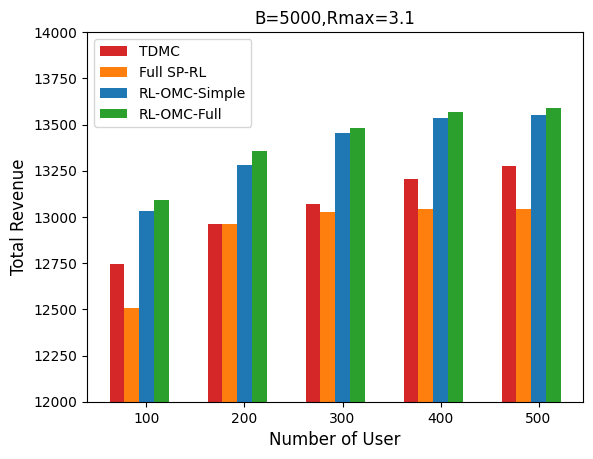

In [21]:
#获得的价值
#['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] 蓝 橙 绿 红
import matplotlib.pyplot as plt
import numpy as np

x = [100,200,300,400,500]#人数

# 定义 y1 和 y2 坐标轴数据
y1 = y41[1:]#TDMC
y2 = y31[1:]#Full SP-RL
y3 = y21[1:]#simple
y4 = y11[1:]#full

# 计算每个柱状图的位置
# 计算每个柱状图的位置
pos1 = np.arange(len(x))
pos2 = [x + 0.15 for x in pos1]
pos3 = [x + 0.3 for x in pos1]
pos4 = [x + 0.45 for x in pos1]
# 绘制柱状图
plt.bar(pos1, y1, width=0.15, label='TDMC',color='#d62728')
plt.bar(pos2, y2, width=0.15, label='Full SP-RL',color='#ff7f0e')
plt.bar(pos3, y3, width=0.15, label='RL-OMC-Simple',color='#1f77b4')
plt.bar(pos4, y4, width=0.15, label='RL-OMC-Full',color='#2ca02c')
# 添加 x 和 y 坐标轴标签
plt.xlabel('Number of User',fontsize=12)
plt.ylabel('Total Revenue',fontsize=12)

# plt.xlim(1,5)
plt.ylim(12000, 14000)
plt.xticks(pos1 + 0.3, x)
# 添加图例
plt.legend()

# 添加图表标题
plt.title('B=5000,Rmax=3.1')
plt.savefig("C:\\Users\\98306\\Desktop\\pdf_figure\\1.1.pdf")
# 显示图表
plt.show()


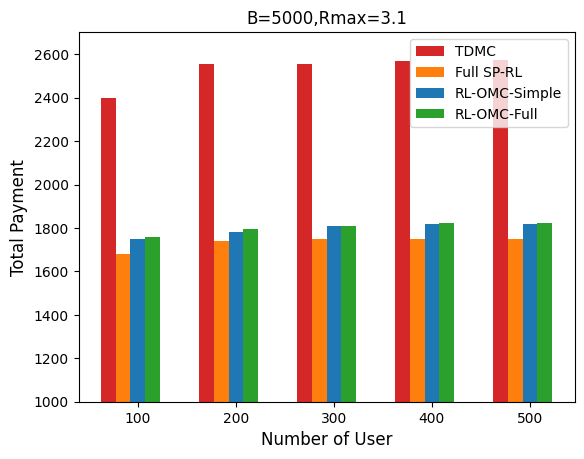

In [22]:
#payment
#['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] 蓝 橙 绿 红
import matplotlib.pyplot as plt
import numpy as np

x = [100,200,300,400,500]#人数

# 定义 y1 和 y2 坐标轴数据
y1 = y42[1:]#TDMC
y2 = y32[1:]#Full SP-RL
y3 = y22[1:]#simple
y4 = y12[1:]#full

# 计算每个柱状图的位置
# 计算每个柱状图的位置
pos1 = np.arange(len(x))
pos2 = [x + 0.15 for x in pos1]
pos3 = [x + 0.3 for x in pos1]
pos4 = [x + 0.45 for x in pos1]
# 绘制柱状图
plt.bar(pos1, y1, width=0.15, label='TDMC',color='#d62728')
plt.bar(pos2, y2, width=0.15, label='Full SP-RL',color='#ff7f0e')
plt.bar(pos3, y3, width=0.15, label='RL-OMC-Simple',color='#1f77b4')
plt.bar(pos4, y4, width=0.15, label='RL-OMC-Full',color='#2ca02c')
# 添加 x 和 y 坐标轴标签
plt.xlabel('Number of User',fontsize=12)
plt.ylabel('Total Payment',fontsize=12)

# plt.xlim(1,5)
plt.ylim(1000, )
plt.xticks(pos1 + 0.3, x)
# 添加图例
plt.legend()

# 添加图表标题
plt.title('B=5000,Rmax=3.1')
plt.savefig("C:\\Users\\98306\\Desktop\\pdf_figure\\1.2.pdf")
# 显示图表
plt.show()


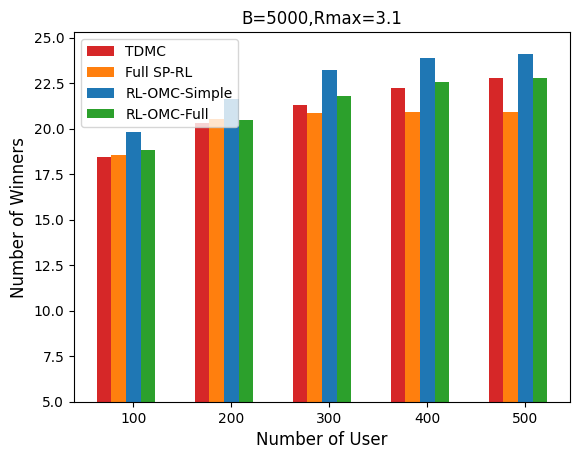

In [23]:
#winner
#['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] 蓝 橙 绿 红
import matplotlib.pyplot as plt
import numpy as np

x = [100,200,300,400,500]#人数

# 定义 y1 和 y2 坐标轴数据
y1 = y43[1:]#TDMC
y2 = y33[1:]#Full SP-RL
y3 = y23[1:]#simple
y4 = y13[1:]#full

# 计算每个柱状图的位置
# 计算每个柱状图的位置
pos1 = np.arange(len(x))
pos2 = [x + 0.15 for x in pos1]
pos3 = [x + 0.3 for x in pos1]
pos4 = [x + 0.45 for x in pos1]
# 绘制柱状图
plt.bar(pos1, y1, width=0.15, label='TDMC',color='#d62728')
plt.bar(pos2, y2, width=0.15, label='Full SP-RL',color='#ff7f0e')
plt.bar(pos3, y3, width=0.15, label='RL-OMC-Simple',color='#1f77b4')
plt.bar(pos4, y4, width=0.15, label='RL-OMC-Full',color='#2ca02c')
# 添加 x 和 y 坐标轴标签
plt.xlabel('Number of User',fontsize=12)
plt.ylabel('Number of Winners',fontsize=12)

# plt.xlim(1,5)
plt.ylim(5, )
plt.xticks(pos1 + 0.3, x)
# 添加图例
plt.legend()

# 添加图表标题
plt.title('B=5000,Rmax=3.1')
plt.savefig("C:\\Users\\98306\\Desktop\\pdf_figure\\1.3.pdf")
# 显示图表
plt.show()


[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6
 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4
 5.5 5.6 5.7 5.8 5.9 6. ]


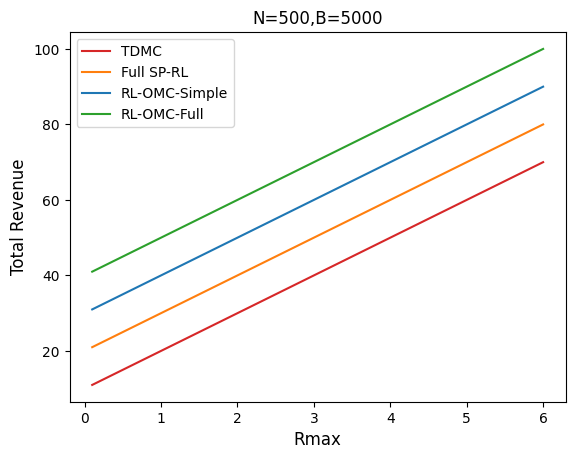

In [65]:
#获得的价值
#['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] 蓝 橙 绿 红
import matplotlib.pyplot as plt
import numpy as np

x=np.array([_ for _ in range(1,61)]).astype(np.double)#人数

x/=10
print(x)
# 定义 y1 和 y2 坐标轴数据
y1 = np.array([_ for _ in range(1,61)]).astype(np.double)+10#TDMC
y2 = np.array([_ for _ in range(1,61)]).astype(np.double)+20#Full SP-RL
y3 = np.array([_ for _ in range(1,61)]).astype(np.double)+30#simple
y4 = np.array([_ for _ in range(1,61)]).astype(np.double)+40#full

# 绘制柱状图
plt.plot(x, y1, label='TDMC',color='#d62728')
plt.plot(x, y2, label='Full SP-RL',color='#ff7f0e')
plt.plot(x, y3, label='RL-OMC-Simple',color='#1f77b4')
plt.plot(x, y4, label='RL-OMC-Full',color='#2ca02c')
# 添加 x 和 y 坐标轴标签
plt.xlabel('Rmax',fontsize=12)
plt.ylabel('Total Revenue',fontsize=12)

# plt.xlim(1,5)
# plt.ylim(12000, 14000)
# 添加图例
plt.legend()

# 添加图表标题
plt.title('N=500,B=5000')

# 显示图表
plt.show()


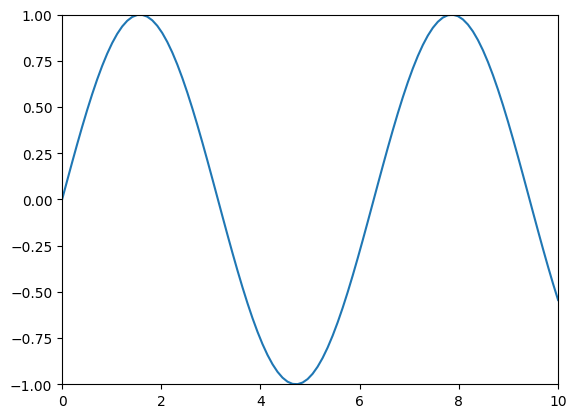

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# 创建数据
x = np.linspace(0, 10, 100)
y = np.sin(x)

# 创建绘图并设置坐标轴
fig, ax = plt.subplots()
ax.plot(x, y)


# 设置坐标轴取值
ax.set_xlim([0, 10])
ax.set_ylim([-1, 1])

# 显示绘图
plt.show()
